In [59]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
METRICS_DIR = "../processing/disease_detection/metrics"

In [39]:
def drop_invariant(df):
    nunique = df.nunique()
    cols_to_drop = nunique[nunique == 1].index
    df = df.drop(cols_to_drop, axis=1)
    return df, cols_to_drop

In [47]:
dfs = {}
df = pd.DataFrame()
cols = set()
for file in os.listdir(METRICS_DIR):
    if file.startswith("final") or os.path.isdir(os.path.join(METRICS_DIR, file)):
        continue
    name = file.split("_")[0]
    single_df = pd.read_csv(os.path.join(METRICS_DIR, file))
    single_df, _ = drop_invariant(single_df)
    recall_col = [col for col in single_df.columns if col.startswith("recall")][0]
    auc_col = [col for col in single_df.columns if col.startswith("auc")][0]
    single_df = single_df.rename(columns={auc_col: "auc", recall_col: "recall"})
    cols.update(single_df.columns)
    dfs[name] = single_df

In [49]:
cols = cols - set(["step", "epoch"])

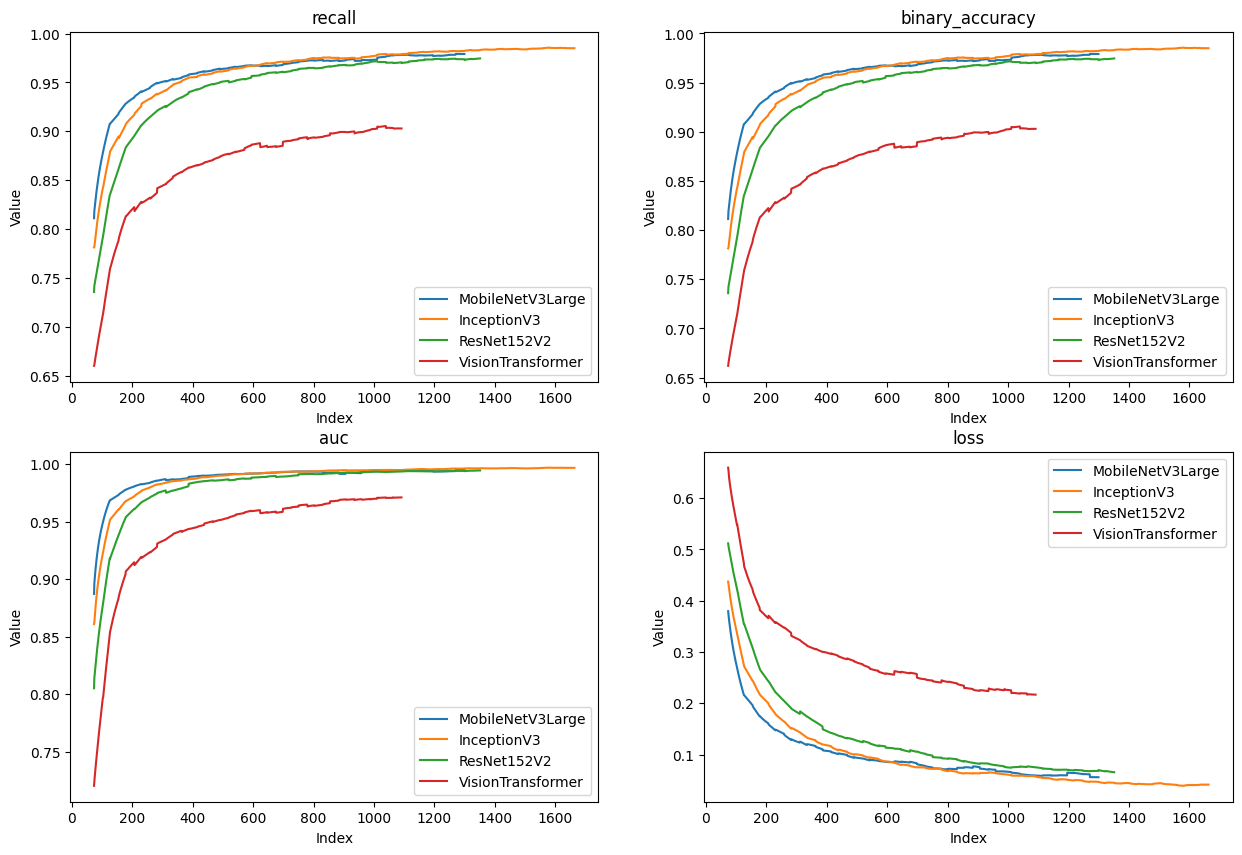

In [50]:
n_cols = len(cols)
n_rows = (n_cols + 1) // 2

window_size = 75

fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(cols):
    for name, df in dfs.items():
        axes[i].plot(df[col].rolling(window=window_size).mean(), label=name)
#        axes[i].plot(df[col], linestyle=(0, (1, 5)), label=name, alpha=.4)
        axes[i].set_title(col)
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel('Value')
        axes[i].legend()

In [52]:
for name, df in dfs.items():
    for col in cols:
        print(name, col, df[col].min(), df[col].max())

MobileNetV3Large recall 0.3333333432674408 1.0
MobileNetV3Large binary_accuracy 0.3333333432674408 1.0
MobileNetV3Large auc 0.2743055522441864 1.0
MobileNetV3Large loss 0.0011988210026174 0.7061594128608704
InceptionV3 recall 0.6587893962860107 1.0
InceptionV3 binary_accuracy 0.6587893962860107 1.0
InceptionV3 auc 0.6787000894546509 1.0
InceptionV3 loss 0.0004823718918487 0.649407148361206
ResNet152V2 recall 0.3333333432674408 1.0
ResNet152V2 binary_accuracy 0.3333333432674408 1.0
ResNet152V2 auc 0.2361111044883728 1.0
ResNet152V2 loss 0.0017245298950001 0.7632208466529846
VisionTransformer recall 0.5 1.0
VisionTransformer binary_accuracy 0.5416666865348816 1.0
VisionTransformer auc 0.5416666865348816 1.0
VisionTransformer loss 0.1274518817663192 1.102041721343994


In [82]:
final_dfs = {}
final_cols = set()
for file in os.listdir(METRICS_DIR):
    if not file.startswith("final"):
        continue
    name = file.split("_")[1]
    df = pd.read_csv(os.path.join(METRICS_DIR, file), index_col="Unnamed: 0")
    df = df.rename(lambda name: re.sub(r'_\d', '', name), axis='columns')
    final_cols.update(df.columns)
    final_dfs[name] = df
final_dfs

{'InceptionV3':          auc  binary_accuracy      loss    recall   val_auc  \
 0   0.887467         0.796090  0.413475  0.796090  0.946698   
 1   0.951292         0.879708  0.275706  0.879708  0.948879   
 2   0.968427         0.910593  0.216128  0.910593  0.978205   
 3   0.976713         0.928154  0.179939  0.928154  0.934495   
 4   0.981743         0.937889  0.153574  0.937889  0.975593   
 5   0.984958         0.946711  0.134983  0.946711  0.989258   
 6   0.986367         0.953136  0.123461  0.953136  0.990309   
 7   0.988215         0.955794  0.113472  0.955794  0.988713   
 8   0.989526         0.960392  0.103248  0.960392  0.988720   
 9   0.990602         0.963246  0.096777  0.963246  0.989768   
 10  0.991365         0.965528  0.090241  0.965528  0.992723   
 11  0.992126         0.968790  0.082197  0.968790  0.991320   
 12  0.992906         0.969948  0.078102  0.969948  0.993779   
 13  0.993561         0.972491  0.073017  0.972491  0.992207   
 14  0.993473         0.9

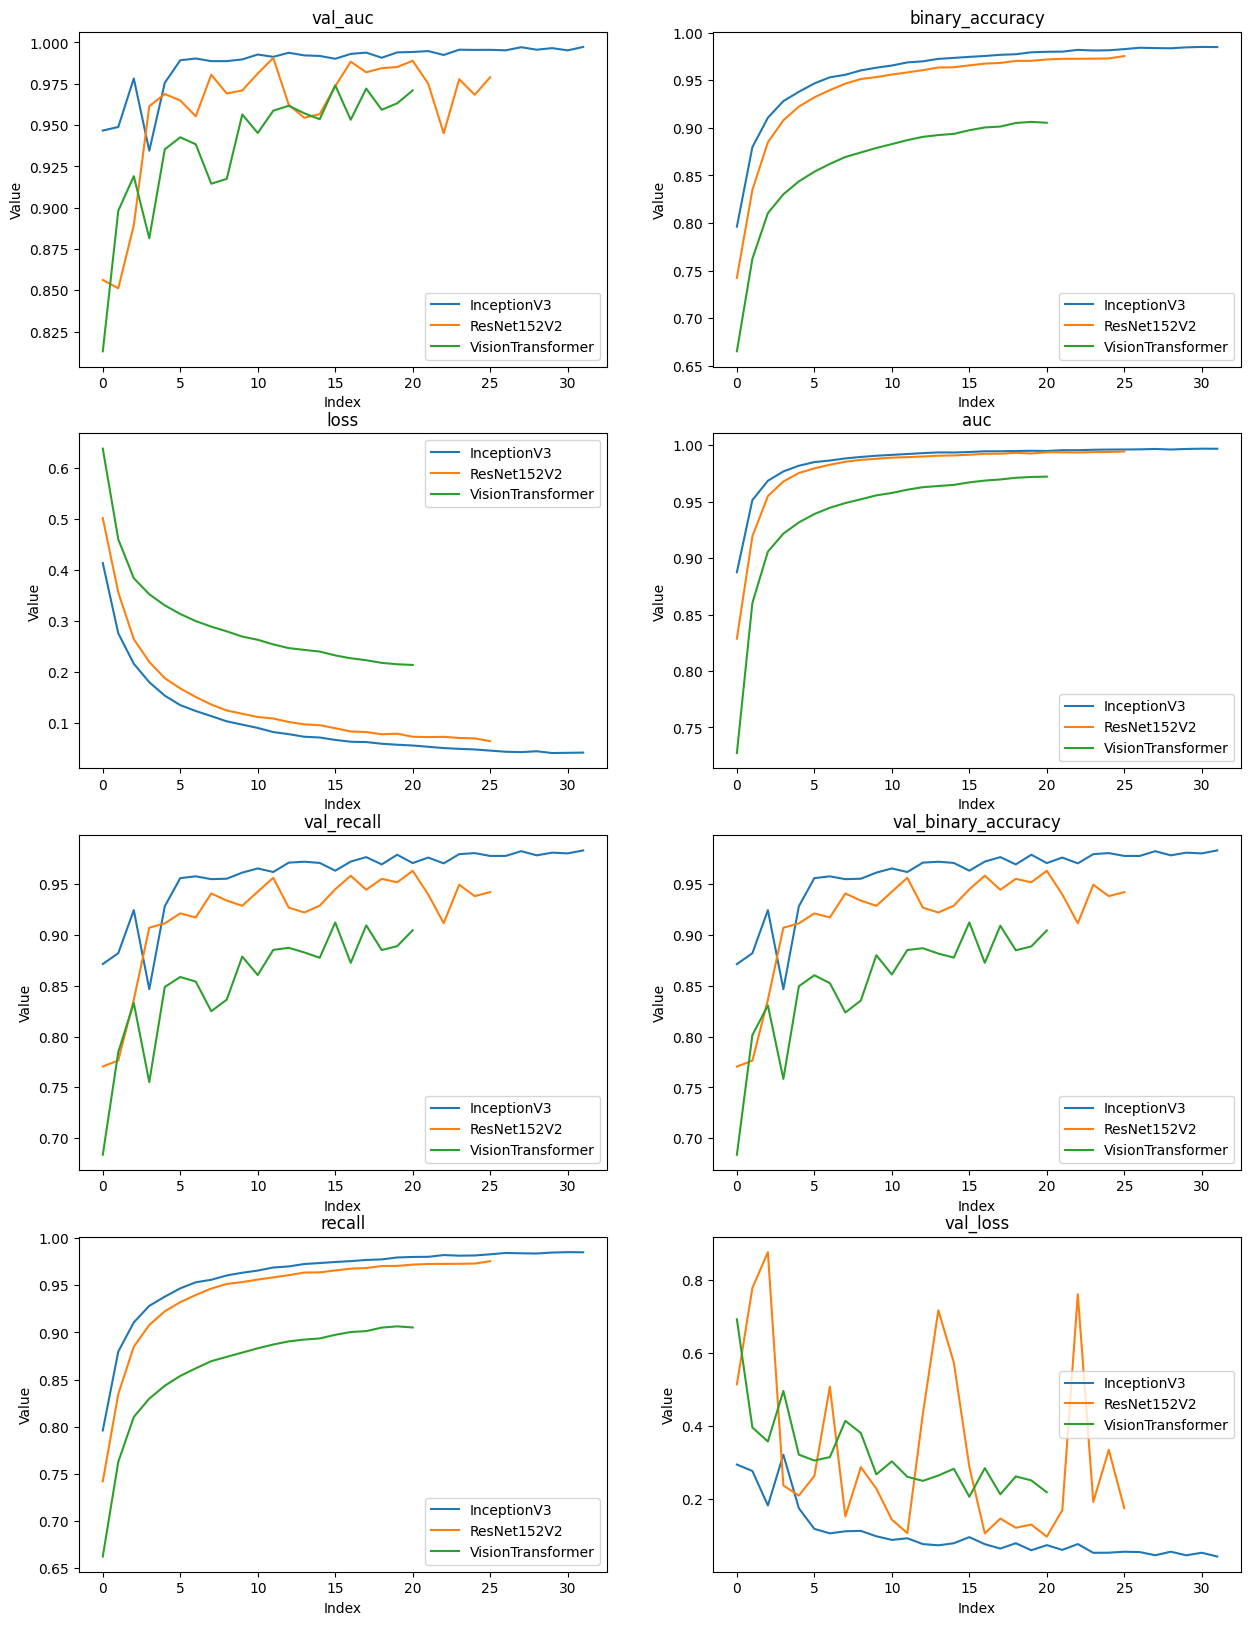

In [89]:
n_cols = len(final_cols)
n_rows = (n_cols + 1) // 2

window_size = 75

fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(final_cols):
    for name, df in final_dfs.items():
        axes[i].plot(df[col], label=name)
        axes[i].set_title(col)
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel('Value')
        axes[i].legend()